<a href="https://colab.research.google.com/github/zzzzzssyy/ECON3916-33674-Statistical-Machine-Learning/blob/main/Lab%208/%5BLab%208%5D%20Hypothesis%20Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Experimental Data


In [8]:
# 1. Load Data (Lalonde Experimental Subset)
df = pd.read_csv('lalonde.csv')

# 2. Split Groups
# treat = 1 (Received Training), treat = 0 (Control)
treated = df[df['treat'] == 1]['re78']
control = df[df['treat'] == 0]['re78']

# Inspect the raw means (The "Economic Reality")
print(f"Mean Treated: ${treated.mean():.2f}")
print(f"Mean Control: ${control.mean():.2f}")

Mean Treated: $6349.14
Mean Control: $6984.17


The Parametirc T-Test

In [17]:

# 3. Calculate Signal (Difference in Means)
signal = treated.mean() - control.mean()

# 4. Calculate Noise (T-Test)
result = stats.ttest_ind(treated, control, equal_var=False)
t_stat = result.statistic
p_val = result.pvalue

print(f"Treatment Effect (Signal): ${signal:.2f}")
print(f"T-Statistic (Signal/Noise): {t_stat:.4f}")
print(f"P-Value: {p_val:.4f}")

# Decision Rule (Alpha = 0.05)
if p_val < 0.05:
    print("Reject Null: The training has a statistically significant effect.")
else:
    print("Fail to Reject Null: Result could be due to chance.")

Treatment Effect (Signal): $-635.03
T-Statistic (Signal/Noise): -0.9377
P-Value: 0.3491
Fail to Reject Null: Result could be due to chance.


The Permutation Test

In [18]:
# Define the test statistic function
def difference_in_means(x, y):
  difference_in_means = np.mean(x) - np.mean(y)

  return difference_in_means

  # Run Permutation Test (10,000 Resamples)
  result = stats.permutation_test((treated, control), difference_in_means,
                              permutation_type='independent',
                              n_resamples=10000,
                              alternative='two-sided')


print(f"Permutation P-Value: {result.pvalue:.4f}")
print("compare this to your T-test P-value. Are they consistent?")

Permutation P-Value: 0.3491
compare this to your T-test P-value. Are they consistent?


Visualizing the Counterfactual

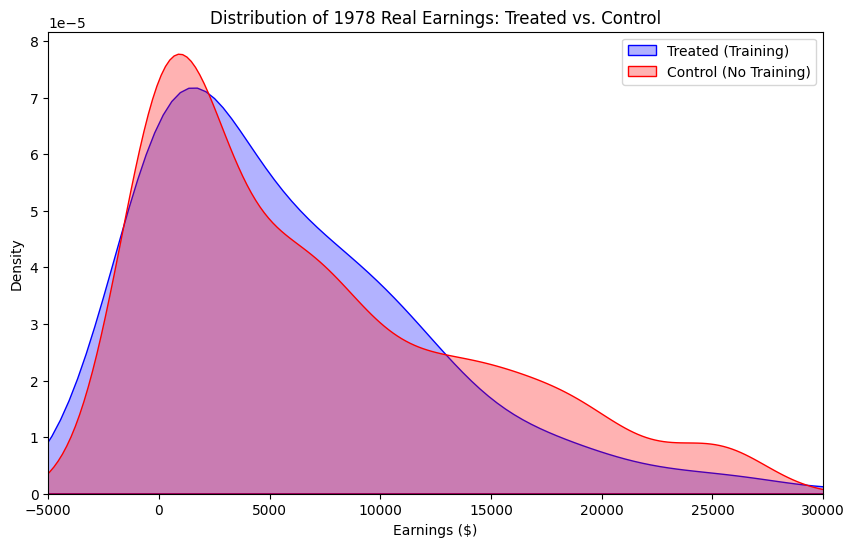

In [19]:
plt.figure(figsize=(10, 6))

# Plot KDE (Kernel Density Estimate) for both groups
sns.kdeplot(treated, fill=True, label='Treated (Training)', color='blue', alpha=0.3)
sns.kdeplot(control, fill=True, label='Control (No Training)', color='red', alpha=0.3)

plt.title('Distribution of 1978 Real Earnings: Treated vs. Control')
plt.xlabel('Earnings ($)')
plt.xlim(-5000, 30000) # Limit x-axis to focus on the core distribution
plt.legend()
plt.show()